<h1> Objective:- Assessment Task 1: Problem solving task. </h1>

<div style="text-align: right"> Owner: <b>Karan Murjani </b> </div>

<h6> Importing all the required libraries </h6>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
os.chdir('/Users/karanmurjani/Downloads/')

<h4> Q1. Load the data from supplied data file. Remove the observations/samples where the heart diseases are not diagnosed by the Cardiologists. Print the data dimension before and after removing the observations/samples.

In [2]:
master_df = pd.read_csv('A1_heart_disease_dataset.csv')
print(master_df.shape)
master_df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
0,63.0,M,tap,145.0,233.0,yes,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,M,asp,120.0,229.0,no,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,M,nap,130.0,250.0,no,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,F,aap,130.0,204.0,no,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [3]:
#Additional data cleaning
master_df.columns= map(str.upper, master_df.columns) #making column names to upper case
master_df[['STATE', 'RESTECG', 'SLOPE', 'THAL', 'EXANG']] = master_df[['STATE','RESTECG', 'SLOPE', 'THAL', 'EXANG']].astype(object) #Categorical Nominal columns

In [4]:
cleaned_df = master_df.dropna(how='all') #Removes blank samples
print('Total number of rows before removing the sample are ' ,master_df.shape[0], ' and columns are ', master_df.shape[1])
print('Total number of rows after removing the sample are ' ,cleaned_df.shape[0], ' and columns are ', cleaned_df.shape[1])
cleaned_df.head(2)

Total number of rows before removing the sample are  303  and columns are  14
Total number of rows after removing the sample are  295  and columns are  14


,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,STATE
0,63.0,M,tap,145.0,233.0,yes,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0


<h4> Q2. Display the number of rows and their indices that have missing data in one or more cells. Now, replace the missing data by the lowest value of the corresponding feature if it is a continuous variable. In case of categorical variable, remove the sample. Print the median values of all features before and after replacing missing data.

In [5]:
#1.1)
null_rows = [index for index, row in cleaned_df.iterrows() if row.isnull().any()]
print('Indices with null values in one or more cells:\n' , null_rows)
print('\n Total number of rows containing null values in one or more cells are: ' ,len(null_rows))

Indices with null values in one or more cells:
 [6, 67, 115, 116, 132, 165, 218, 223, 228, 290, 302]

 Total number of rows containing null values in one or more cells are:  11


In [6]:
#1.2)
def NullValueImputation(df1):
    df2 = df1.copy()
    for col in df2:
        # select only float dtypes and replace with minimum values
        if df2[col].dtype == "float":
            df2[col] = df2[col].fillna(df2[col].min())
        # select only categorical data and remove the sample where it is null
        elif df2[col].dtype in ("object", "int"):
            df2 = df2.dropna(subset=[col])
    return df2

final_df = NullValueImputation(cleaned_df) #Applying function

CleanedContinuousVariable = cleaned_df.select_dtypes('float64')
FinalContinuousVariable = final_df.select_dtypes('float64')

print('Median before replacing missing data:\n \n',CleanedContinuousVariable.median())
print('\n Median after replacing missing data:\n \n',FinalContinuousVariable.median())

Median before replacing missing data:
 
 AGE          55.0
TRESTBPS    130.0
CHOL        242.0
THALACH     153.0
OLDPEAK       0.7
CA            0.0
dtype: float64

 Median after replacing missing data:
 
 AGE          55.50
TRESTBPS    130.00
CHOL        242.50
THALACH     152.00
OLDPEAK       0.75
CA            0.00
dtype: float64


<h4> Q3. Is there any change in data type? If yes, convert them back to appropriate data types. Print all variables with corresponding data type.

In [7]:
print(master_df.dtypes)
final_df[['AGE', 'STATE', 'RESTECG', 'SLOPE', 'THAL', 'EXANG']] = final_df[['AGE','STATE', 'RESTECG', 'SLOPE', 'THAL', 'EXANG']].astype(int)
print('\n', final_df.dtypes)
print('\n \n Changes done in data types.')

AGE         float64
SEX          object
CP           object
TRESTBPS    float64
CHOL        float64
FBS          object
RESTECG      object
THALACH     float64
EXANG        object
OLDPEAK     float64
SLOPE        object
CA          float64
THAL         object
STATE        object
dtype: object

 AGE           int64
SEX          object
CP           object
TRESTBPS    float64
CHOL        float64
FBS          object
RESTECG       int64
THALACH     float64
EXANG         int64
OLDPEAK     float64
SLOPE         int64
CA          float64
THAL          int64
STATE         int64
dtype: object

 
 Changes done in data types.


<h4> Q4. Print the total numbers and ration of male and female patients who are at highest risk of heart disease.

In [8]:
HighRiskPatients_df = final_df.query('STATE==4')
MaleHighRiskPatient = len(HighRiskPatients_df.query('SEX=="M"')) #Count of Male high risk patient
FemaleHighRiskPatient = len(HighRiskPatients_df.query('SEX=="F"')) #Count of Female high risk patient
TotalPatient = len(HighRiskPatients_df) #Total high risk patients
print('Ratio of Male high risk patient to total patient is:', round((MaleHighRiskPatient/TotalPatient)*100,2))
print('Ratio of Female high risk patient to total patient is:', round((FemaleHighRiskPatient/TotalPatient)*100,2))

Ratio of Male high risk patient to total patient is: 84.62
Ratio of Female high risk patient to total patient is: 15.38


<h4> Q5. Is there any association between heart rate and severity of heart disease? Explain your results from given dataset.

In [9]:
print('Degree of association between heart rate and severity of heart disease is: ', 
      round(final_df['THALACH'].corr(final_df['STATE']),3))      

Degree of association between heart rate and severity of heart disease is:  -0.378


Explanation

<p> Here by correlation value we can say that it is low negative correlation between heart rate and severity of heart disease i.e. severity of heart disease is getting less affected by heart rate. <br> One unit of heart rate changes the severity by -0.378. </p>

<h4> Q6. Print the average cholesterol level for different number of blocked blood vessels across gender. Please report the pattern found in the result, if any.

In [10]:
final_df_groupped = final_df.groupby(['CA', 'SEX']).agg({'CHOL':'mean'}).round(2).reset_index()
final_df_groupped

,CA,SEX,CHOL
0,0.0,F,255.95
1,0.0,M,235.72
2,1.0,F,271.79
3,1.0,M,241.31
4,2.0,F,275.45
5,2.0,M,244.21
6,3.0,F,272.50
7,3.0,M,264.87


<p> Here from above dataframe we can say that <br> -> When number of blood vessels affected are max then Male have highest average of Cholesterol level of 272.45 mg/dl where as for female when number of blood vessel affected are 2 then Cholesterol level is max i.e. 275.45 mg/dl. <br> -> On an average Cholestrol level of females are higher than Male. <br> -> Minimum Cholesterol level for Male is 235.43 mg/dl and Maximum is 272.50 mg/dl <br> -> Minimum Cholesterol level for Female is 255.95 mg/dl and Maximum is 275.45 mg/dl </p>


<h4> Q7. Print the percentage of patients at risk of heart disease having abnormality in both ECG and blood sugar with asymptomatic chest pain.

In [11]:
AbnormalBlood_ECG_AsymptomaticCP = final_df.query('FBS=="yes" and RESTECG!=0 and STATE!=0 and CP=="asp"')
HeartDiseasePatient = final_df.query('STATE!=0')
RatioBloodAsymptomatic = round((len(AbnormalBlood_ECG_AsymptomaticCP)/len(HeartDiseasePatient))*100, 2)
print('Ratio of patient at risk of heart disease with Abnormal blood sugar and ECG with asymptomatic chest pain is:\n',RatioBloodAsymptomatic)        

Ratio of patient at risk of heart disease with Abnormal blood sugar and ECG with asymptomatic chest pain is:
 8.33


<h4> Q8. Calculate and print the average blood pressure of all observations with non-flat ST slopes of ECG.

In [12]:
averageBPS = round((final_df.query('SLOPE!=2')['TRESTBPS'].mean()),2)
print('Average Blood Pressure with non-flat ST slopes of ECG is:',averageBPS)

Average Blood Pressure with non-flat ST slopes of ECG is: 130.99


<h4> Q9. Create and print a dataframe of the heart rate, blood pressure and cholesterol levels for different age
groups (based on 10 years interval).

In [13]:
AgeGroup_final_df = final_df.copy()
bins= [30,40,50,60,70,80]
labels = ['30-39', '40-49','50-59', '60-69', '70-79']
AgeGroup_final_df['AGE_GROUP'] = pd.cut(AgeGroup_final_df['AGE'], bins=bins, labels=labels, right=False)
AgeGroup_final_df_groupped = AgeGroup_final_df.groupby('AGE_GROUP').agg({'TRESTBPS':'mean', 'CHOL':'mean', 'THALACH':'mean'}).round(2).reset_index()
AgeGroup_final_df_groupped

,AGE_GROUP,TRESTBPS,CHOL,THALACH
0,30-39,124.29,219.79,169.50
1,40-49,123.87,236.74,159.43
2,50-59,133.45,248.03,147.54
3,60-69,135.26,259.63,140.17
4,70-79,135.80,249.60,130.50


<h4> Q10. Find the average cholesterol level of across gender for each age group. Please explain the results.

In [14]:
print('Average Cholesterol level in mg/dl across different age groups and gender:')
AgeGroup_final_df.groupby(['AGE_GROUP', 'SEX']).agg({'CHOL':'mean'}).round(2).reset_index()

Average Cholesterol level in mg/dl across different age groups and gender:


,AGE_GROUP,SEX,CHOL
0,30-39,F,205.40
1,30-39,M,227.78
2,40-49,F,234.53
3,40-49,M,237.58
4,50-59,F,269.85
5,50-59,M,239.51
6,60-69,F,282.20
7,60-69,M,244.91
8,70-79,F,236.40
9,70-79,M,262.80


Explantion:
    
<p> -> Elder patients have higher cholesterol level compared to younger patients. 
<br> -> Highest cholesterol level is 282.20 mg/dl for female and for male it is only 262.80 mg/dl.
<br> -> Lowest cholesterol level is 205.40 mg/dl for female whereas 227.78 mg/dl is for male.
</p>

<h4> Q11. Draw two scatter plots of cholesterol level, one against blood pressure and another against heart rate. Draw them in two subplots of the same plot.

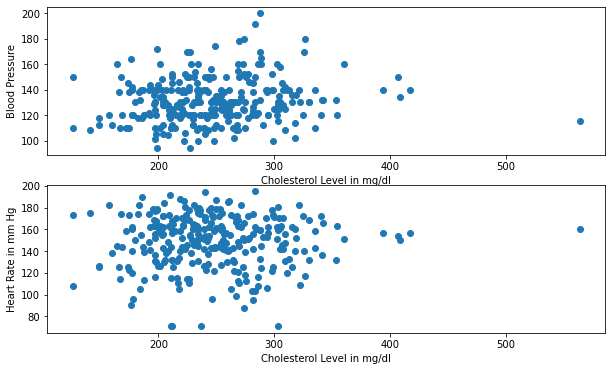

In [15]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = final_df['CHOL'], y = final_df['TRESTBPS'])
ax[0].set_xlabel("Cholesterol Level in mg/dl")
ax[0].set_ylabel("Blood Pressure")

ax[1].scatter(x = final_df['CHOL'], y = final_df['THALACH'])
ax[1].set_xlabel("Cholesterol Level in mg/dl")
ax[1].set_ylabel("Heart Rate in mm Hg")

plt.show()

<h4> Q12. Visualize the cholesterol level against number of blood vessel blocked for male and female using line plot. Explain the graph base on your observation.

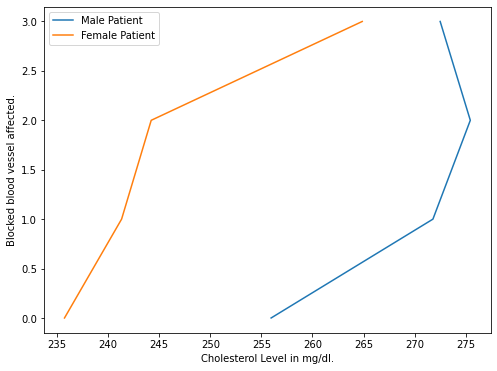

In [16]:
Male_BloodVessels= final_df_groupped.query('SEX=="M"')
Female_BloodVessels = final_df_groupped.query('SEX=="F"')

plt.figure(figsize=(8,6))
plt.plot(Female_BloodVessels['CHOL'], Female_BloodVessels['CA'], label = 'Male Patient')
plt.plot(Male_BloodVessels['CHOL'], Male_BloodVessels['CA'], label = 'Female Patient')
plt.legend()
plt.xlabel('Cholesterol Level in mg/dl.')
plt.ylabel('Blocked blood vessel affected.')
plt.show()

Explanation

<p> -> Female have higher cholesterol level compared to male and as number of blocked blood vessel increases then cholesterol level also increases.
<br> -> Male have highest of 264.87 mg/dl cholesterol level whereas female have highest of 275.45 mg/dl cholesterol level.
<br> -> Lowest of cholesterol level for male is 235.72 mg/dl whereas for female it is 255.95 mg/dl

<h4> Q13. Draw a group bar diagram of heart rate, blood pressure and total number of patients, based on age groups defined in question 9. Explain your observation from the graph.

<AxesSubplot:title={'center':'Grouped Bar Graph with dataframe'}, xlabel='AGE_GROUP'>

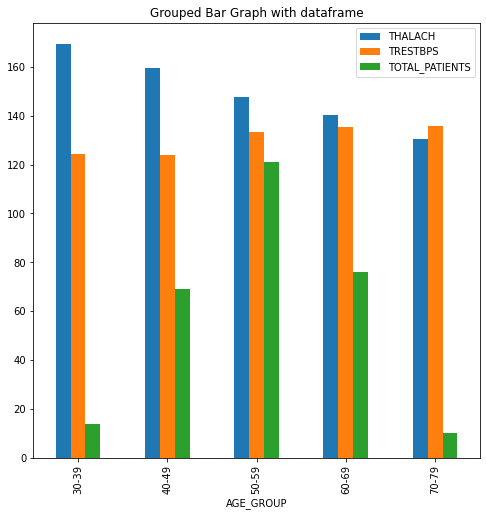

In [17]:
final_df_groupped2 = AgeGroup_final_df.groupby('AGE_GROUP').agg({'THALACH':'mean', 'TRESTBPS':'mean', 
                                                        'AGE':'count'}).rename(columns={'AGE':'TOTAL_PATIENTS'}).reset_index()
# fig, ax = plt.subplots(figsize = (10,7))
final_df_groupped2.plot(x='AGE_GROUP',
#                                    subplots(1,2),
        kind='bar',
        stacked=False,
        figsize=(8,8),
        title='Grouped Bar Graph with dataframe')


Explanation

<p> -> Our data contains highest patients from 50-59 age group and their average heart rate is 169.5 and 133.45 is their average blood pressure mm Hg.
<br> -> Younger adults have high heart rate and less blood pressure whereas adults with more than 60 years of age has lowest heart rate and highest blood pressure.
</p> -> Our data contains only 10 patient from 70-79 age group and their average heart rate is  and 135.80 is their average blood pressure in mm Hg.

<h4> Q14. Add two more columns named [‘num_male_patients’, ‘num_female_patients’] and having values of the number of male and female patients affected by heart disease in each age group respectively. Save the combined dataset to a csv file named ‘age_group_stat.csv’ in the same directory of your code file.

In [18]:
TotalPatient_df = AgeGroup_final_df.query('STATE!=0').groupby(['AGE_GROUP', 'SEX']).agg({'AGE':'count'}).rename(columns = {'AGE':'TotalPatients'}).reset_index()
table = pd.pivot_table(TotalPatient_df, values='TotalPatients', index=['AGE_GROUP'], columns=['SEX'], aggfunc=np.sum)
table = table.reset_index().rename(columns={'F':'Num_FemalePatients', 'M':'Num_MalePatients'}).rename_axis('', axis='columns')
AgeGroupStat_df = AgeGroup_final_df_groupped.merge(table, on='AGE_GROUP', how='left')
AgeGroupStat_df.to_csv('age_group_stat.csv', index=False)
AgeGroupStat_df

,AGE_GROUP,TRESTBPS,CHOL,THALACH,Num_FemalePatients,Num_MalePatients
0,30-39,124.29,219.79,169.50,0,4
1,40-49,123.87,236.74,159.43,1,20
2,50-59,133.45,248.03,147.54,10,48
3,60-69,135.26,259.63,140.17,11,34
4,70-79,135.80,249.60,130.50,0,4


<h4> Q15. Replace all the rows where the ‘state’ is null with its immediate previous row. Finally, display and save the resultant dataset to a csv file named ‘clean_data.csv’ in the same directory of your code file.

In [19]:
clean_df = master_df.dropna(how='all')
clean_df['STATE'] = clean_df['STATE'].fillna(method='ffill')
clean_df.reset_index(inplace=True, drop=True)
clean_df.to_csv('clean_data.csv')
clean_df.head()

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,STATE
0,63.0,M,tap,145.0,233.0,yes,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,M,asp,120.0,229.0,no,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,M,nap,130.0,250.0,no,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,F,aap,130.0,204.0,no,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


![Alt Text](https://media.giphy.com/media/H4zC1A2FZ0ViA6GcxD/giphy.gif)